<a href="https://colab.research.google.com/github/BorisOskolkov/MLcourse/blob/main/asng02/A02_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Made by Boris Oskolkov for Assignment03 (CS5783)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import string
import pandas as pd
from IPython.display import Image

# Define activation function
def sigmoid(z):
	return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))

 --------- start of a first problem --------------

So, we need to create update rule for 2-layer regression model. For that we need to find how to calculate changing of weights and biases for 1st and 2nd layer. Assume, that we have simple 1-perceptron model. I will use chain rule for deriving the update rule.

Denote x as input, y as output, z(n) as linear equation of nth layer, σ(z) is activation function - sigmoid, a(n) as output of nth layer. L is for the loss between output layer and training data (we use MSE). So, our model will looks like the following. 

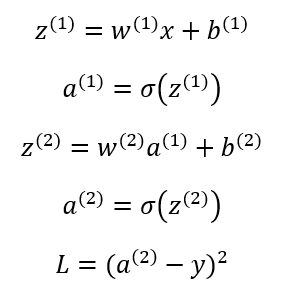

To derive update rule, we have to find following terms (we need update weights and biases).

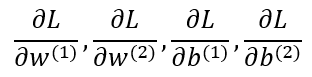

To find these terms I will apply chain rule. All calculations presented below

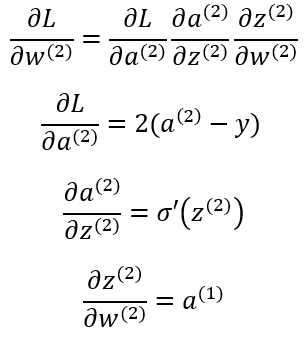

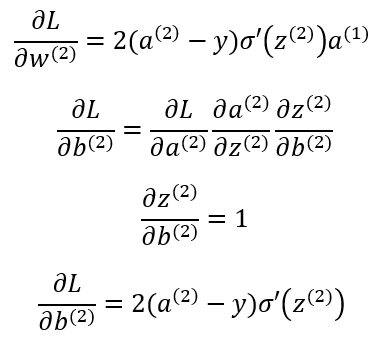

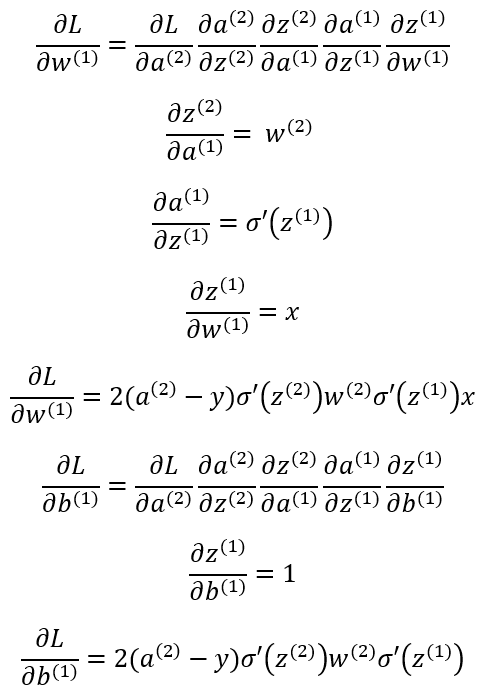

So, update rule will follow:

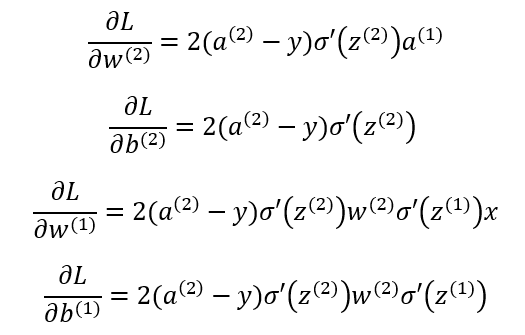

The difference, which i see between applying log-loss error and MSE error is that MSE error drive learning 2 times faster.

--------- end of a first problem --------------

--------- start of a second problem --------------

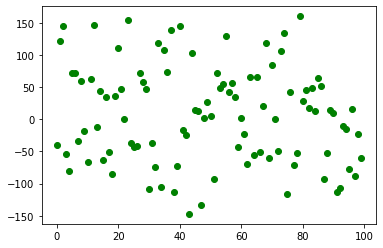

In [3]:
# Define given data
x = np.loadtxt("X_train.csv")
y = np.loadtxt("Y_train.csv")
plt.plot(y, 'go')
plt.show()


**Answer to the first question:**


I see that train output in range [-150;150]. So, I will use linear activation function for output layer to let our network output these numbers. 

In [4]:
print(f'X\'s shape is {np.shape(x)}')
print(f'Y\'s shape is {np.shape(y)}')

X's shape is (100, 2)
Y's shape is (100,)


**Answer to the second question:**

I will use three neurons in hidden layer and one in output layer, since we have 100 entries for 2 features and 100 values in output data. For that I will initialize weights and biases for every neuron.

Let's do forward pass.

In [68]:
# Define weights and biases
# three neurons in first layer
W1 = np.random.rand(3,2)
b1 = np.random.rand(3,1)

# output neuron in second layer
W2 = np.random.rand(3,1)
b2 = np.random.rand(1,1)

In [6]:
# Fwd Pass
z1 = np.dot(W1,x.T) + b1
a1 = sigmoid(z1)

z2 = np.dot(W2.T,a1) + b2
a2 = z2
 # Initial output
m=100
mse = np.sum((a2-y)**2)/(2*m)
print(f"MSE is equal to {mse}")

MSE is equal to 2844.8585024393956


Our model based on random values resulted MSE as mentioned (it is quite big). Now we need to update weights and biases using backpropagation.

In [7]:
# Backward pass

# Compute gradients
dz2 = (a2 - y)/m
dW2 = np.dot(a1,dz2.T)
db2 = np.sum(dz2)
dz1 = W2*dz2*sigmoid_derivative(z1)
dW1 = np.dot(dz1,x)
db1 = np.sum(dz1, axis = 1).reshape(3,1)


In [8]:
 # Update weights
W1 = W1 - dW1
W2 = W2 - dW2
b1 = b1 - db1
b2 = b2 - db2

In [9]:
# Fwd Pass
z1 = np.dot(W1,x.T) + b1
a1 = sigmoid(z1)

z2 = np.dot(W2.T,a1) + b2
a2 = z2
 # Initial output
#print("Prediction:", a2, "Actual:", y)
m=100
mse = np.sum((a2-y)**2)/(2*m)
print(f"MSE is equal to {mse}")

MSE is equal to 2152.487816623743


After updating weights and biases MSE becomes smaller, so we can implement this code to train our network until convergence. I will define a function for that and apply it.

In [137]:
def train_network(x, y, W1, W2, b1, b2, lr, n_it, n_n):
  # Fwd Pass
  z1 = np.dot(W1,x.T) + b1
  a1 = sigmoid(z1)

  z2 = np.dot(W2.T,a1) + b2
  a2 = z2

  m=y.shape[0]
  mse = np.zeros(n_it,)
  # Backward pass
  for i in range(n_it):
    # Compute gradients
    dz2 = (a2 - y)/m
    dW2 = np.dot(a1,dz2.T)
    db2 = np.sum(dz2)
    dz1 = W2*dz2*sigmoid_derivative(z1)
    dW1 = np.dot(dz1,x)
    db1 = np.sum(dz1, axis = 1).reshape(n_n,1)
    # Update weights and biases
    W1 = W1 - lr*dW1
    W2 = W2 - lr*dW2
    b1 = b1 - lr*db1
    b2 = b2 - lr*db2
      # Fwd Pass
    z1 = np.dot(W1,x.T) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(W2.T,a1) + b2
    a2 = z2
    
    m=y.shape[0]
    mse[i] = np.sum((a2-y)**2)/(2*m)
    
  print(f"MSE is equal to {mse[i]}, iteration #{i+1}, learning rate is {lr}")
  prediction = a2
  return W1, W2, b1, b2, prediction, mse


As you could mention I have designed function for various number of hidden neurons. I have done this to test which composition will work better. For that I will plot the learning perfomance (based on MSE) of my network composed from different number neurons in hidden layer.

In [145]:
def show_mse_change_for_2_layer_regr_nn(number_of_hidden_neurons):
  n_of_iterations = 5000
  # weights and biases in first layer
  W1 = np.random.rand(number_of_hidden_neurons,2)
  b1 = np.random.rand(number_of_hidden_neurons,1)

  # weights and biases in second layer
  W2 = np.random.rand(number_of_hidden_neurons,1)
  b2 = np.random.rand(1,1)
  __, __, __, __, __, mse1 = train_network(x, y, W1, W2, b1, b2, 0.002, n_of_iterations, number_of_hidden_neurons)
  __, __, __, __, __, mse2 = train_network(x, y, W1, W2, b1, b2, 0.02, n_of_iterations, number_of_hidden_neurons)
  __, __, __, __, __, mse3 = train_network(x, y, W1, W2, b1, b2, 0.1, n_of_iterations, number_of_hidden_neurons)
  plt.plot(mse1, label='learning rate is 0.002')
  plt.plot(mse2, label='learning rate is 0.02')
  plt.plot(mse3, label='learning rate is 0.1')
  plt.title(f"Learning network with {number_of_hidden_neurons} hidden neurons")
  plt.xlabel("Iteration")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

MSE is equal to 230.30052422392072, iteration #5000, learning rate is 0.002
MSE is equal to 138.256512879716, iteration #5000, learning rate is 0.02
MSE is equal to 298.0911546767459, iteration #5000, learning rate is 0.1


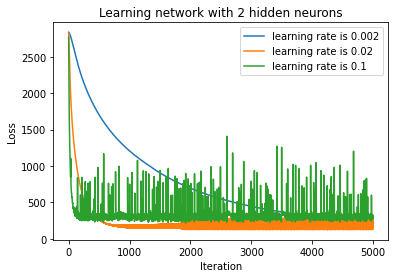

MSE is equal to 154.94072635272983, iteration #5000, learning rate is 0.002
MSE is equal to 38.459299928528594, iteration #5000, learning rate is 0.02
MSE is equal to 325.04871625752884, iteration #5000, learning rate is 0.1


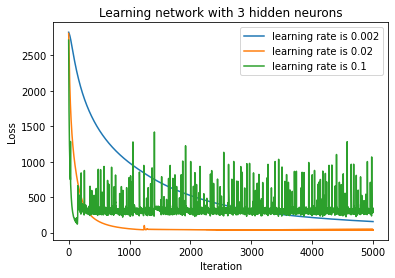

MSE is equal to 124.26844577300503, iteration #5000, learning rate is 0.002
MSE is equal to 9.200286923326194, iteration #5000, learning rate is 0.02
MSE is equal to 94.6668821868306, iteration #5000, learning rate is 0.1


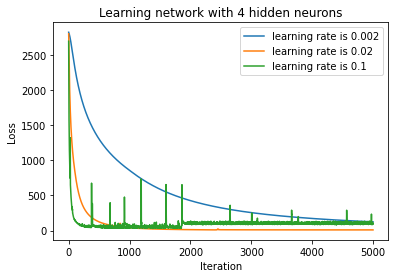

MSE is equal to 106.12836313817733, iteration #5000, learning rate is 0.002
MSE is equal to 2.796018050606093, iteration #5000, learning rate is 0.02
MSE is equal to 25.7650307182201, iteration #5000, learning rate is 0.1


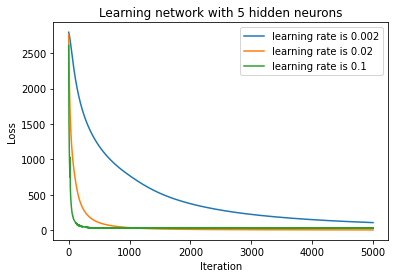

MSE is equal to 95.71768548284737, iteration #5000, learning rate is 0.002
MSE is equal to 2.2264560442537085, iteration #5000, learning rate is 0.02
MSE is equal to 19.232747908471456, iteration #5000, learning rate is 0.1


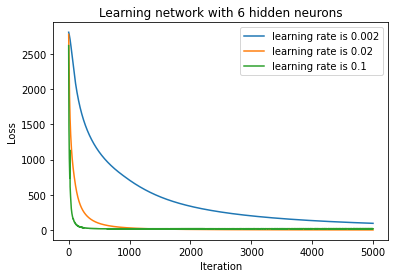

MSE is equal to 90.86471435586711, iteration #5000, learning rate is 0.002
MSE is equal to 2.117975453269382, iteration #5000, learning rate is 0.02
MSE is equal to 6.444584398751152, iteration #5000, learning rate is 0.1


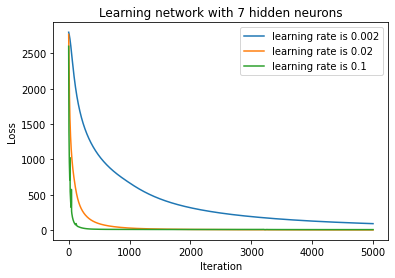

MSE is equal to 85.5348867789716, iteration #5000, learning rate is 0.002
MSE is equal to 1.8923259416297231, iteration #5000, learning rate is 0.02
MSE is equal to 5.871376111128993, iteration #5000, learning rate is 0.1


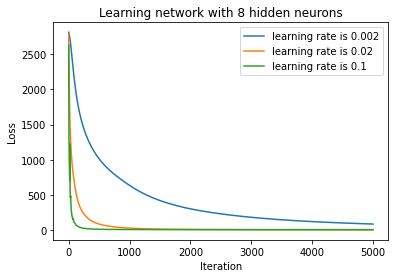

MSE is equal to 82.07294895164709, iteration #5000, learning rate is 0.002
MSE is equal to 2.1610937467693327, iteration #5000, learning rate is 0.02
MSE is equal to 3.476833138781911, iteration #5000, learning rate is 0.1


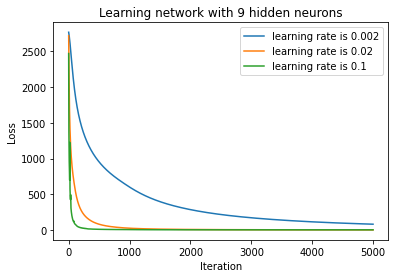

MSE is equal to 79.49580649156836, iteration #5000, learning rate is 0.002
MSE is equal to 1.6413939216130613, iteration #5000, learning rate is 0.02
MSE is equal to 0.25331237762897213, iteration #5000, learning rate is 0.1


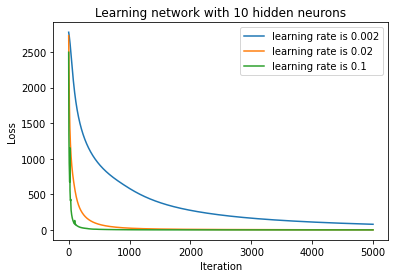

MSE is equal to 78.26454119519838, iteration #5000, learning rate is 0.002
MSE is equal to 1.686640011877114, iteration #5000, learning rate is 0.02
MSE is equal to 0.3022677918639205, iteration #5000, learning rate is 0.1


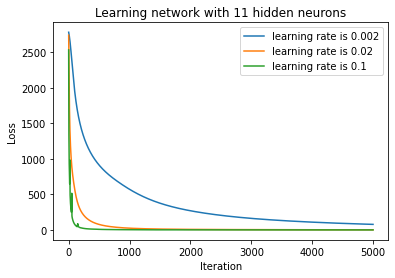

In [146]:
for i in range(10):
  show_mse_change_for_2_layer_regr_nn(i+2)

Based on reported data I assume that convergent neural network could be trained with 5 hidden neurons after 5000 iteraions and 0.02 learning rate.

In [97]:
x_test = np.loadtxt("X_test.csv")
y_test = np.loadtxt("Y_test.csv")

# Fwd Pass
z1 = np.dot(W1,x_test.T) + b1
a1 = sigmoid(z1)

z2 = np.dot(W2.T,a1) + b2
a2 = z2
 # Initial output
#print("Prediction:", a2, "Actual:", y)
m=50
mse = np.sum((a2-y_test)**2)/(2*m)
print(f"MSE is equal to {mse}")

MSE is equal to 107.91561128392024


--------- end of a second problem --------------